In [1]:
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
%matplotlib inline

In [2]:
sns.set(style="whitegrid")
color_palette = ['Red', 'Black', 'Blue']
figsize=(12,6)

In [3]:
#dataset_name = '13129_0.5_0.003'
dataset_name = 'set0'

opt_prefixes = ['c_', 'h_', 'f_']

for opt in opt_prefixes:
    exec(opt + 'tsdf = pd.read_csv(' + '"../runs/' + opt + dataset_name + '/timeslot_data.csv' + '")' )
    exec(opt + 'sfcdf = pd.read_csv(' + '"../runs/' + opt + dataset_name + '/sfc_data.csv' + '")' )

In [4]:
c_tsdf.head()

,timeslot,carbon_footprint,brown_energy,green_energy,acceptance_ratio,migration_count,ps_min,ps_5th,ps_mean,ps_95th,ps_max
0,0,0.000,0.000,0.0,100.0,0,11.0,11.15,12.5,13.85,14.0
1,1,5.982,5.542,0.0,100.0,0,10.0,10.00,10.0,10.00,10.0
2,2,0.000,0.000,0.0,100.0,0,12.0,12.10,13.0,13.90,14.0
3,3,0.000,0.000,0.0,100.0,0,0.0,0.00,0.0,0.00,0.0


In [5]:
h_tsdf.head()

,timeslot,carbon_footprint,brown_energy,green_energy,acceptance_ratio,migration_count,ps_min,ps_5th,ps_mean,ps_95th,ps_max
0,0,0.000,0.000,0.0,100.0,0,11.0,11.15,12.5,13.85,14.0
1,1,6.351,5.542,0.0,100.0,0,10.0,10.00,10.0,10.00,10.0
2,2,0.000,0.000,0.0,100.0,0,12.0,12.10,13.0,13.90,14.0
3,3,0.000,0.000,0.0,100.0,0,0.0,0.00,0.0,0.00,0.0


In [6]:
f_tsdf.head()

,timeslot,carbon_footprint,brown_energy,green_energy,acceptance_ratio,migration_count,ps_min,ps_5th,ps_mean,ps_95th,ps_max
0,0,0.000,0.000,0.0,100.0,0,11.0,11.15,12.5,13.85,14.0
1,1,6.351,5.542,0.0,100.0,0,10.0,10.00,10.0,10.00,10.0
2,2,0.000,0.000,0.0,100.0,0,12.0,12.10,13.0,13.90,14.0
3,3,0.000,0.000,0.0,100.0,0,0.0,0.00,0.0,0.00,0.0


In [7]:
cf_df = c_tsdf[['timeslot', 'carbon_footprint']]
cf_df.columns = ['Timeslot', 'Optimal']
cf_df.loc[:,'Tabu Search'] = h_tsdf['carbon_footprint']
cf_df.loc[:,'Baseline'] = f_tsdf['carbon_footprint']

/usr/local/lib/python3.5/dist-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.5/dist-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [8]:
cf_df.head()

,Timeslot,Optimal,Tabu Search,Baseline
0,0,0.000,0.000,0.000
1,1,5.982,6.351,6.351
2,2,0.000,0.000,0.000
3,3,0.000,0.000,0.000


In [9]:
ts_melt = cf_df.melt(id_vars='Timeslot', var_name="Optimizer", value_name="Carbon Footprint")
mask = ((ts_melt['Timeslot'] <= 24) & (ts_melt['Timeslot'] > 0))
ts_melt = ts_melt[mask]
ts_melt.head()

,Timeslot,Optimizer,Carbon Footprint
1,1,Optimal,5.982
2,2,Optimal,0.000
3,3,Optimal,0.000
5,1,Tabu Search,6.351
6,2,Tabu Search,0.000


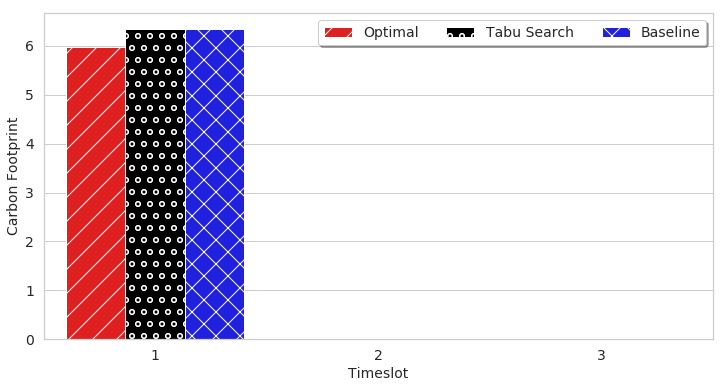

In [10]:
plt.figure(figsize=figsize)

SMALL_SIZE = 14
MEDIUM_SIZE = 14
BIGGER_SIZE = 14

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

bars = sns.barplot(x="Timeslot", y="Carbon Footprint", hue="Optimizer", data=ts_melt, 
            palette=color_palette)

num_locations = len(ts_melt['Timeslot'].unique())
hatches = itertools.cycle(['/', 'o', 'x', 'x', '\\', '*', 'o', 'O', '.'])
for i, bar in enumerate(bars.patches):
    if i % num_locations == 0:
        hatch = next(hatches)
    bar.set_hatch(hatch)
plt.legend(loc='upper right', fancybox=True, shadow=True, ncol=3)

In [11]:
gn_df = c_tsdf[['timeslot', 'green_energy']]
gn_df.columns = ['Timeslot', 'Optimal']
gn_df.loc[:,'Tabu Search'] = h_tsdf['green_energy']
gn_df.loc[:,'Baseline'] = f_tsdf['green_energy']

In [12]:
gn_df.head()

,Timeslot,Optimal,Tabu Search,Baseline
0,0,0.0,0.0,0.0
1,1,0.0,0.0,0.0
2,2,0.0,0.0,0.0
3,3,0.0,0.0,0.0


In [13]:
gn_melt = gn_df.melt(id_vars='Timeslot', var_name="Optimizer", value_name="Green Energy")
mask = ((gn_melt['Timeslot'] <= 24) & (gn_melt['Timeslot'] > 0))
gn_melt = gn_melt[mask]
gn_melt.head()

,Timeslot,Optimizer,Green Energy
1,1,Optimal,0.0
2,2,Optimal,0.0
3,3,Optimal,0.0
5,1,Tabu Search,0.0
6,2,Tabu Search,0.0


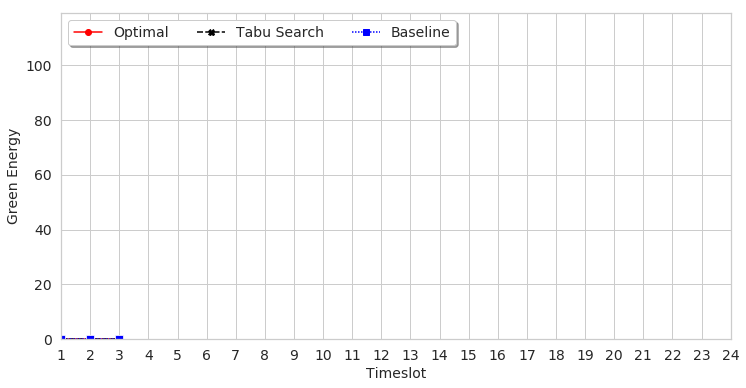

In [14]:
fig, ax = plt.subplots(figsize=figsize)
g = sns.lineplot(x='Timeslot', y='Green Energy', hue='Optimizer', data=gn_melt, ax=ax, 
                 style="Optimizer", markers=True, palette=color_palette, markersize=8)

g.xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.xlim(1, 24)
plt.ylim(0, 119)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[1:], labels=labels[1:], loc='upper left', fancybox=True, shadow=True, ncol=3)
#plt.savefig('lineplot.pdf')